## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## DATA LOADING

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
# Melihat semua feature dalam dataset

print(df.columns.values)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']


In [5]:
# Melihat tipe data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Semua data merupakan data numerikal. Namun perlu diperiksa kembali kolom dengan data hasil _encode_ data kategorikal.

Tidak ada missing values dalam dataset. Namun perlu diperiksa kembali _unique values_ dari masing-masing kolom.

In [6]:
print(df.columns)
for col in df:
    print(df[col].unique())

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
[0 1]
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  

Tidak ada _missing values_ dalam dataset.

Kolom 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking' berisi data numerik hasil encode.

- Data numerik kontinu: creatinine_phosphokinase, platelets, serum_creatinine, serum_sodium	
- Data numerik diskrit: age, ejection_fraction, time

Melihat label _imbalance_ / tidak.

In [7]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Jumlah prediksi pasien meninggal: 96
Jumlah prediksi pasien hidup: 203


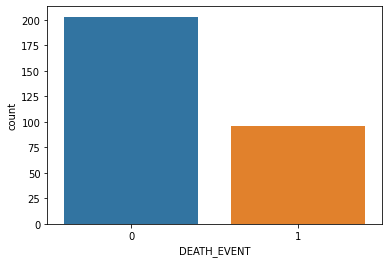

In [8]:
sns.countplot(data= df, x= 'DEATH_EVENT')
No, Yes = df.DEATH_EVENT.value_counts()
print('Jumlah prediksi pasien meninggal:', Yes)
print('Jumlah prediksi pasien hidup:', No)

Perbandingan 'yes' : 'no' adalah sekitar 1:2, label tidak _imbalanced_.

## EXPLORATORY DATA ANALYSIS (EDA)

Melihat distribusi data numerikal.

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Skewness Value :  age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
DEATH_EVENT                 0.770349
dtype: float64


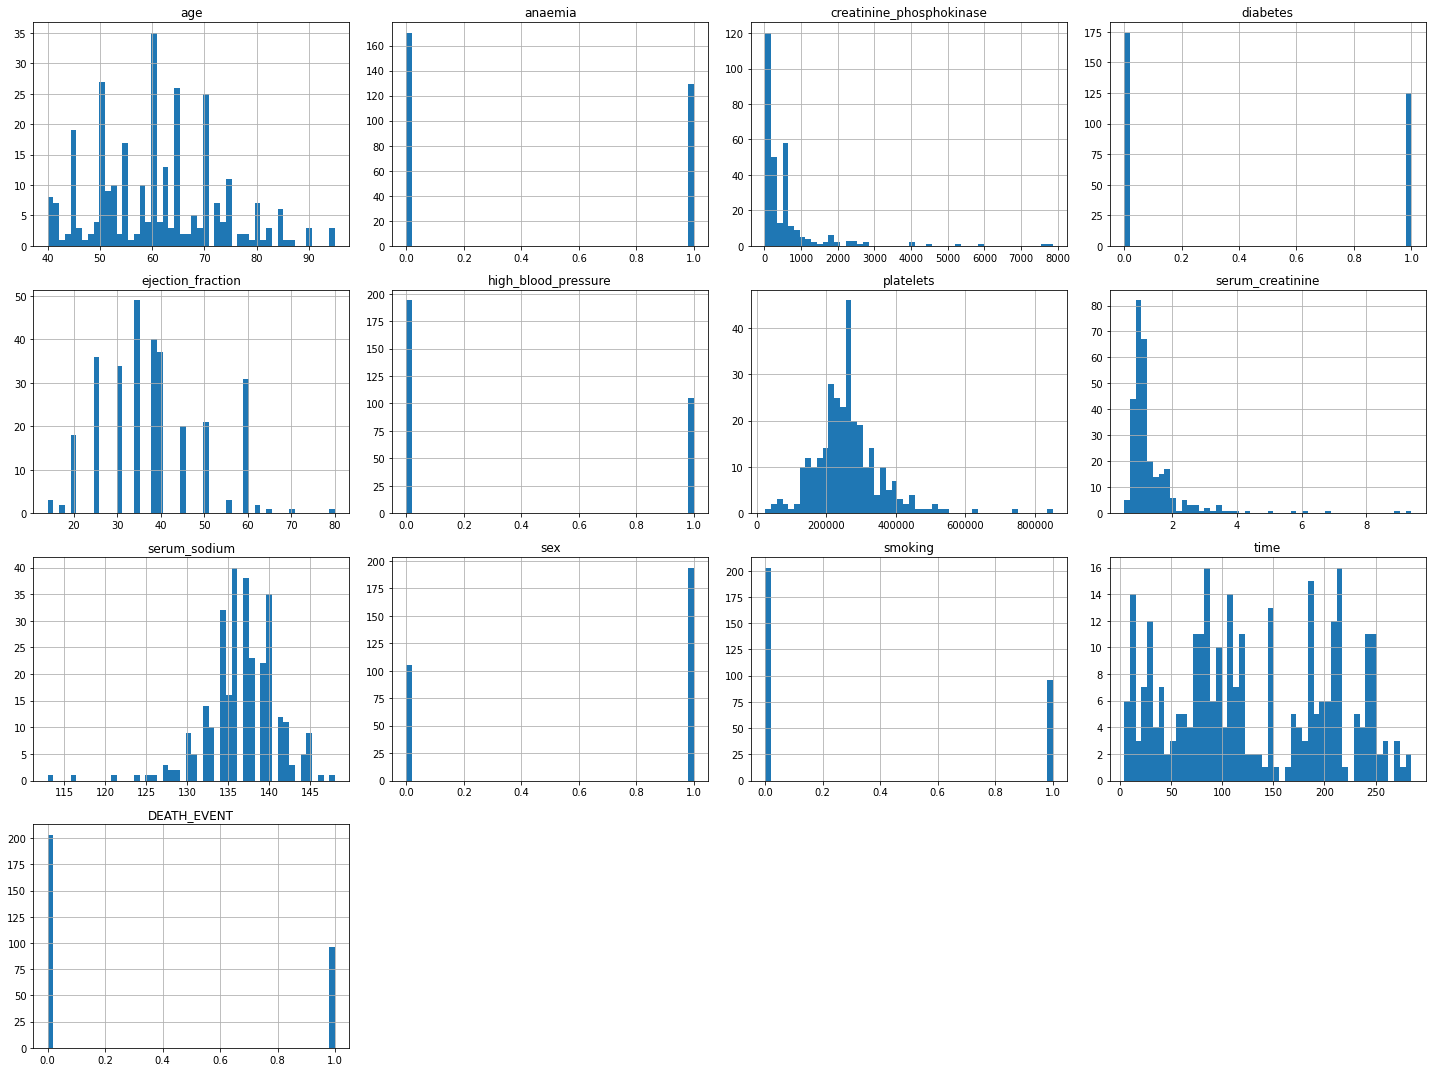

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
print('Skewness Value : ', df[df.columns].skew())

Kolom 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium' berdistribusi skewed. Kolom 'age' dan 'time' berdistribusi normal.

Melihat hubungan feature dengan outcome.

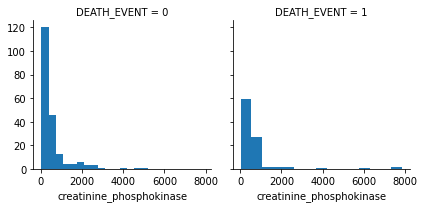

In [11]:
creatinine_phosphokinase = sns.FacetGrid(df, col= 'DEATH_EVENT')

creatinine_phosphokinase.map(plt.hist, 'creatinine_phosphokinase', bins= 15)

Pasien dengan level enzim CPK yang tinggi dalam darahnya cenderung meninggal dalam sebelum _follow up_ berikutnya.

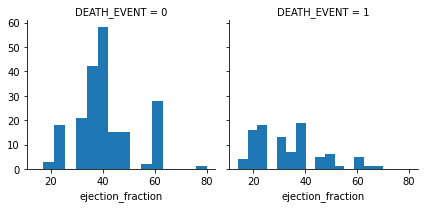

In [12]:
ejection_fraction = sns.FacetGrid(df, col= 'DEATH_EVENT')

ejection_fraction.map(plt.hist, 'ejection_fraction', bins= 15)

Persentase darah yang meninggalkan jantung setiap kali jantung berkontraksi terlihat kurang dapat dijadikan parameter pasien yang berpotensi meninggal sebelum _follow up_ berikutnya, karena tidak ada perubahan yang cukup terlihat antara 'ejection_fraction' pada pasien meninggal jika dibandingkan dengan pasien yang hidup.

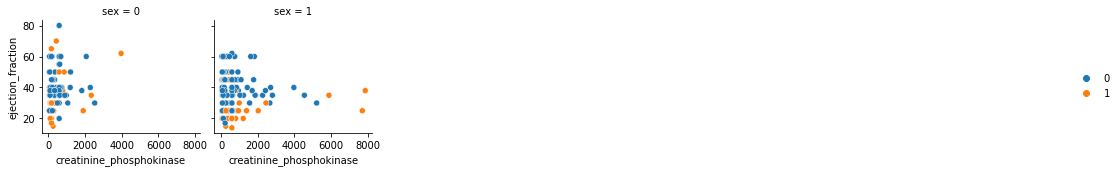

In [13]:
g = sns.FacetGrid(df, col="sex", height=2.5, col_wrap=6)
g.map_dataframe(sns.scatterplot, x="creatinine_phosphokinase", y="ejection_fraction", hue="DEATH_EVENT")
g.add_legend()

Terlihat hubungan yang linear antara "creatinine_phosphokinase" dan "ejection_fraction". Laki-laki cenderung memiliki nilai CPK yang tinggi daripada perempuan, dan meninggal sebelum _follow up_ berikutnya.

## DATA CLEANING / PREPROCESSING

Split data untuk model inference sebanyak 5 baris.

In [14]:
df_inference = df.sample(n= 5)
df_inference

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
206,40.0,1,101,0,40,0,226000.0,0.8,141,0,0,187,0
84,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1
205,50.0,1,167,1,45,0,362000.0,1.0,136,0,0,187,0
172,70.0,1,171,0,60,1,176000.0,1.1,145,1,1,146,0
78,75.0,1,203,1,38,1,283000.0,0.6,131,1,1,74,0


In [15]:
df_copy = df.copy()

In [16]:
df_copy_ = df_copy.drop([df_copy.index[52], df_copy.index[176], df_copy.index[257], df_copy.index[84], df_copy.index[18]])

In [17]:
df_copy_

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Split data menjadi Train set (80%) dan Test set (20%).

In [18]:
df_copy_.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [19]:
X = df_copy_[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine',
            'serum_sodium', 'sex', 'smoking', 'time']]
X[0:5]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [20]:
y = df_copy_[['DEATH_EVENT']]
y[0:5]

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [22]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278
142,50.0,0,482,1,30,0,329000.0,0.9,132,0,0,109
168,65.0,0,582,1,40,0,270000.0,1.0,138,0,0,140
105,72.0,1,328,0,30,1,621000.0,1.7,138,0,1,88
280,70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,247
...,...,...,...,...,...,...,...,...,...,...,...,...
279,55.0,0,84,1,38,0,451000.0,1.3,136,0,0,246
247,64.0,0,143,0,25,0,246000.0,2.4,135,1,0,214
272,67.0,0,213,0,38,0,215000.0,1.2,133,0,0,245
41,50.0,0,124,1,30,1,153000.0,1.2,136,0,1,32


#### TRAIN set - Outlier handling

Melihat adanya outlier pada setiap kolom dalam dataset Train. Penetapan batas outlier yang ada pada masing-masing kolom dilakukan berdasarkan jenis distribusi variabelnya, normal atau skewed. Handling outlier secara capping pada distribusi normal menggunakan standar deviasi (std) sebagai batasnya, sementara pada distribusi skewed menggunakan IQR.

Kolom 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking' dipisahkan dulu karena merupakan data numerik yang berisi hasil encode.

In [23]:
# Membuat df num_labaled
num_labaled = pd.DataFrame(X_train[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]).copy()

In [24]:
# Drop kolom 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking' pada X_train
X_train = X_train.drop(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis= 1)

In [25]:
X_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
296,45.0,2060,60,742000.0,0.8,138,278
142,50.0,482,30,329000.0,0.9,132,109
168,65.0,582,40,270000.0,1.0,138,140
105,72.0,328,30,621000.0,1.7,138,88
280,70.0,2695,40,241000.0,1.0,137,247
...,...,...,...,...,...,...,...
279,55.0,84,38,451000.0,1.3,136,246
247,64.0,143,25,246000.0,2.4,135,214
272,67.0,213,38,215000.0,1.2,133,245
41,50.0,124,30,153000.0,1.2,136,32


In [26]:
# Fungsi untuk plot histogram dan boxplot
def diagnostic_plots(df, variable):
    plt.figure()

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    # Skewness value
    skewness = df[variable].skew()

    plt.tight_layout()
    plt.show()
    print('\nSkewness Value : ', skewness)

In [27]:
# NORMAL DISTRIBUTION
# Fungsi untuk menentukan upper boundary dan lower boundary

out = []
def std_outliers(df, variable):
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    upper_boundary = df[variable].mean() + 3 * df[variable].std()

    for i in df[variable]:
        if i > upper_boundary or i < lower_boundary:
            out.append(i)

    print('Lower boundary:', lower_boundary)
    print('Upper boundary:', upper_boundary)
    outlier = pd.DataFrame(out).count()
    print('Outliers:', outlier)

In [28]:
# SKEWED DISTRIBUTION
# Fungsi untuk menentukan upper boundary dan lower boundary

out = []
def iqr_outliers(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1

    lower_boundary = q1 - 1.5 * iqr
    upper_boundary = q3 + 1.5 * iqr

    for i in df[variable]:
        if i > upper_boundary or i < lower_boundary:
            out.append(i)
    
    print('Lower boundary:', lower_boundary)
    print('Upper boundary:', upper_boundary)
    outlier = pd.DataFrame(out).count()
    print('Outliers:', outlier)

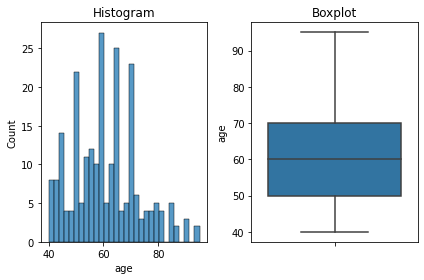


Skewness Value :  0.40319784846738144
Distribusi normal.
Lower boundary: 24.610931642540613
Upper boundary: 96.92382580426789
Outliers: Series([], dtype: int64)
Before Capping
count    235.000000
mean      60.767379
std       12.052149
min       40.000000
25%       50.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64
After Capping
count    235.000000
mean      60.767379
std       12.052149
min       40.000000
25%       50.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64
Before Capping


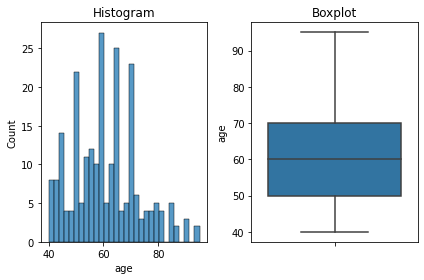


Skewness Value :  0.40319784846738144

After Capping


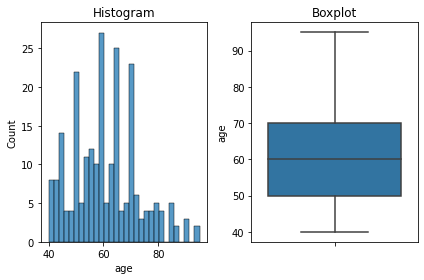


Skewness Value :  0.40319784846738144


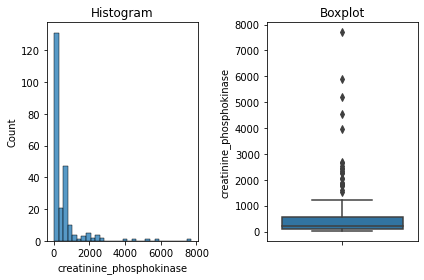


Skewness Value :  4.282315018561668
Distribusi skewed.
Lower boundary: -599.25
Upper boundary: 1290.75
Outliers: 0    22
dtype: int64
Before Capping
count     235.000000
mean      552.940426
std       925.027745
min        23.000000
25%       109.500000
50%       231.000000
75%       582.000000
max      7702.000000
Name: creatinine_phosphokinase, dtype: float64
After Capping
count     235.000000
mean      404.393617
std       384.321580
min        23.000000
25%       109.500000
50%       231.000000
75%       582.000000
max      1290.750000
Name: creatinine_phosphokinase, dtype: float64
Before Capping


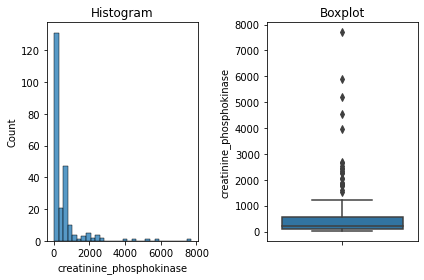


Skewness Value :  4.282315018561668

After Capping


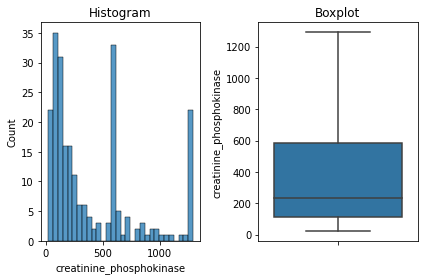


Skewness Value :  1.185623984221311


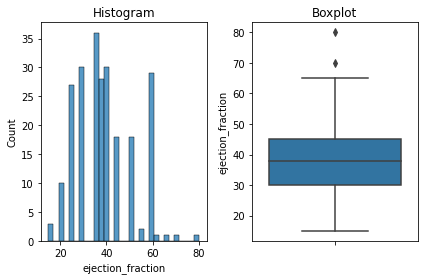


Skewness Value :  0.5604169760745705
Distribusi skewed.
Lower boundary: 7.5
Upper boundary: 67.5
Outliers: 0    24
dtype: int64
Before Capping
count    235.000000
mean      39.085106
std       11.961887
min       15.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64
After Capping
count    235.000000
mean      39.021277
std       11.779018
min       15.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       67.500000
Name: ejection_fraction, dtype: float64
Before Capping


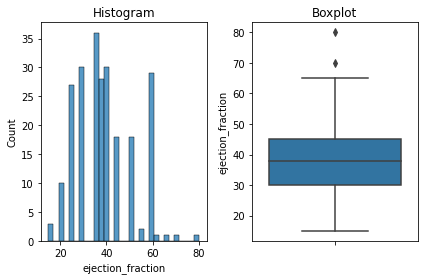


Skewness Value :  0.5604169760745705

After Capping


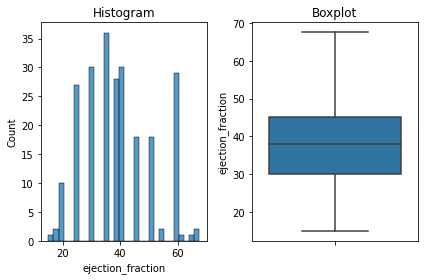


Skewness Value :  0.4657727371233621


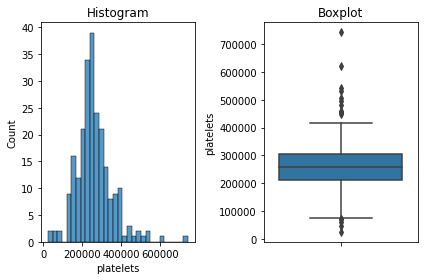


Skewness Value :  1.0638256673620232
Distribusi skewed.
Lower boundary: 73750.0
Upper boundary: 443750.0
Outliers: 0    40
dtype: int64
Before Capping
count       235.000000
mean     263040.299787
std       93656.627602
min       25100.000000
25%      212500.000000
50%      259000.000000
75%      305000.000000
max      742000.000000
Name: platelets, dtype: float64
After Capping
count       235.000000
mean     259784.555106
std       81534.252610
min       73750.000000
25%      212500.000000
50%      259000.000000
75%      305000.000000
max      443750.000000
Name: platelets, dtype: float64
Before Capping


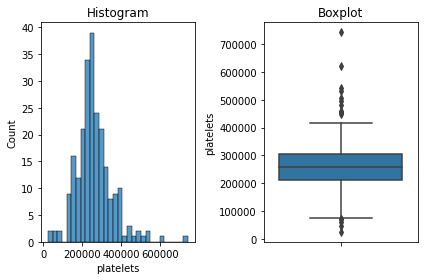


Skewness Value :  1.0638256673620232

After Capping


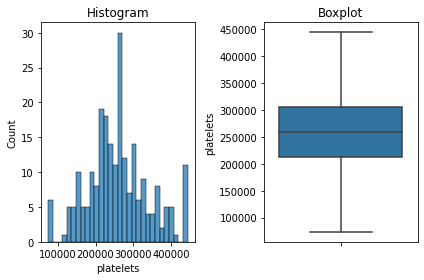


Skewness Value :  0.2542750844939288


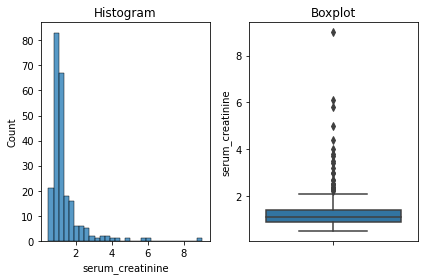


Skewness Value :  4.098345986178029
Distribusi skewed.
Lower boundary: 0.15000000000000024
Upper boundary: 2.1499999999999995
Outliers: 0    64
dtype: int64
Before Capping
count    235.000000
mean       1.372383
std        0.940517
min        0.500000
25%        0.900000
50%        1.100000
75%        1.400000
max        9.000000
Name: serum_creatinine, dtype: float64
After Capping
count    235.000000
mean       1.231532
std        0.444192
min        0.500000
25%        0.900000
50%        1.100000
75%        1.400000
max        2.150000
Name: serum_creatinine, dtype: float64
Before Capping


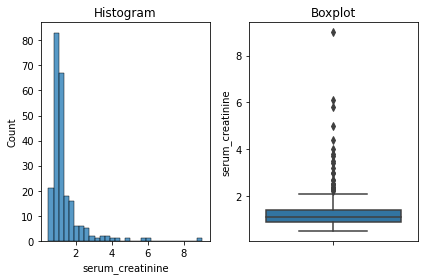


Skewness Value :  4.098345986178029

After Capping


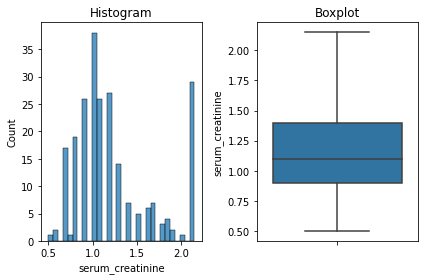


Skewness Value :  0.9303885421521723


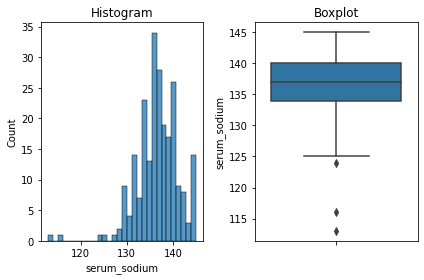


Skewness Value :  -1.1426182093563786
Distribusi skewed.
Lower boundary: 125.0
Upper boundary: 149.0
Outliers: 0    67
dtype: int64
Before Capping
count    235.000000
mean     136.651064
std        4.398614
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      145.000000
Name: serum_sodium, dtype: float64
After Capping
count    235.000000
mean     136.744681
std        4.022735
min      125.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      145.000000
Name: serum_sodium, dtype: float64
Before Capping


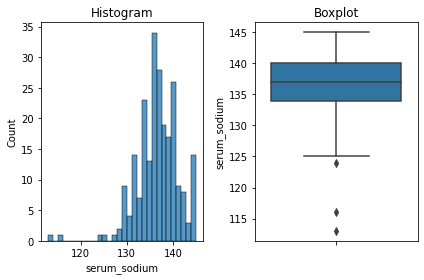


Skewness Value :  -1.1426182093563786

After Capping


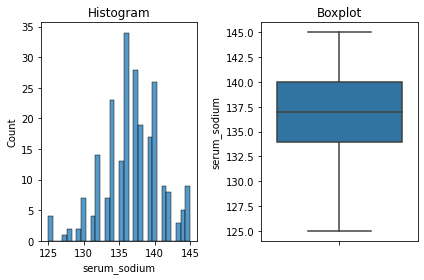


Skewness Value :  -0.28521506365658106


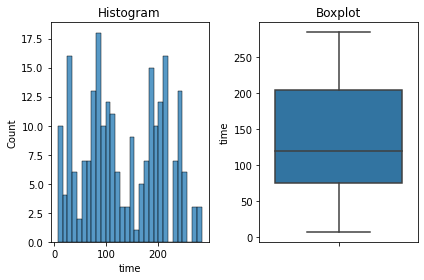


Skewness Value :  0.0715782625595496
Distribusi normal.
Lower boundary: -91.97362092248594
Upper boundary: 361.7863868799327
Outliers: 0    67
dtype: int64
Before Capping
count    235.000000
mean     134.906383
std       75.626668
min        7.000000
25%       75.500000
50%      120.000000
75%      205.000000
max      285.000000
Name: time, dtype: float64
After Capping
count    235.000000
mean     134.906383
std       75.626668
min        7.000000
25%       75.500000
50%      120.000000
75%      205.000000
max      285.000000
Name: time, dtype: float64
Before Capping


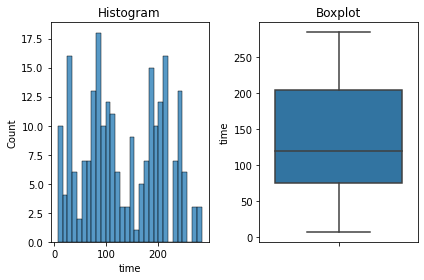


Skewness Value :  0.0715782625595496

After Capping


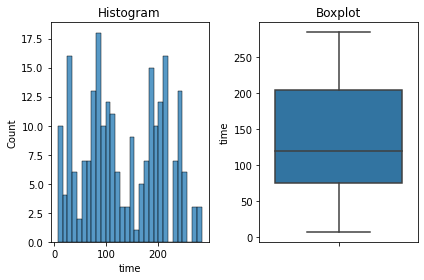


Skewness Value :  0.0715782625595496


In [29]:
for variable in X_train.describe().columns:
    df = X_train
    # Fungsi untuk plot histogram dan boxplot
    diagnostic_plots(df, variable)
    # Skewness value
    skewness = df[variable].skew()

    if -0.5 <= skewness <= 0.5:
        print('Distribusi normal.')
        std_outliers(df, variable)

        # Melakukan capping pada data outlier pada kolom dengan distribusi variabel normal
        windsoriser = Winsorizer(capping_method= 'gaussian',
                        tail= 'both',
                        fold= 3,
                        variables= [variable],
                        missing_values= 'ignore')

        windsoriser.fit(df)
        df_t = windsoriser.transform(df)

        print('Before Capping')
        print(df[variable].describe())
        print('After Capping')
        print(df_t[variable].describe())

        # Memvisualisasikan distribusi & outlier pada kolom sebelum & sesudah capping
        print('Before Capping')
        diagnostic_plots(df, variable)
        print('\nAfter Capping')
        diagnostic_plots(df_t, variable)

        X_train = df_t

    else:
        print('Distribusi skewed.')
        iqr_outliers(df, variable)

        # Melakukan capping pada data outlier pada kolom dengan distribusi variabel skewed
        windsoriser = Winsorizer(capping_method= 'iqr',
                        tail= 'both',
                        fold= 1.5,
                        variables= [variable],
                        missing_values= 'ignore')

        windsoriser.fit(df)
        df_t = windsoriser.transform(df)

        print('Before Capping')
        print(df[variable].describe())
        print('After Capping')
        print(df_t[variable].describe())

        # Memvisualisasikan distribusi & outlier pada kolom sebelum & sesudah capping
        print('Before Capping')
        diagnostic_plots(df, variable)
        print('\nAfter Capping')
        diagnostic_plots(df_t, variable)

        X_train = df_t

Skewness Value :  age                         0.403198
creatinine_phosphokinase    1.185624
ejection_fraction           0.465773
platelets                   0.254275
serum_creatinine            0.930389
serum_sodium               -0.285215
time                        0.071578
dtype: float64


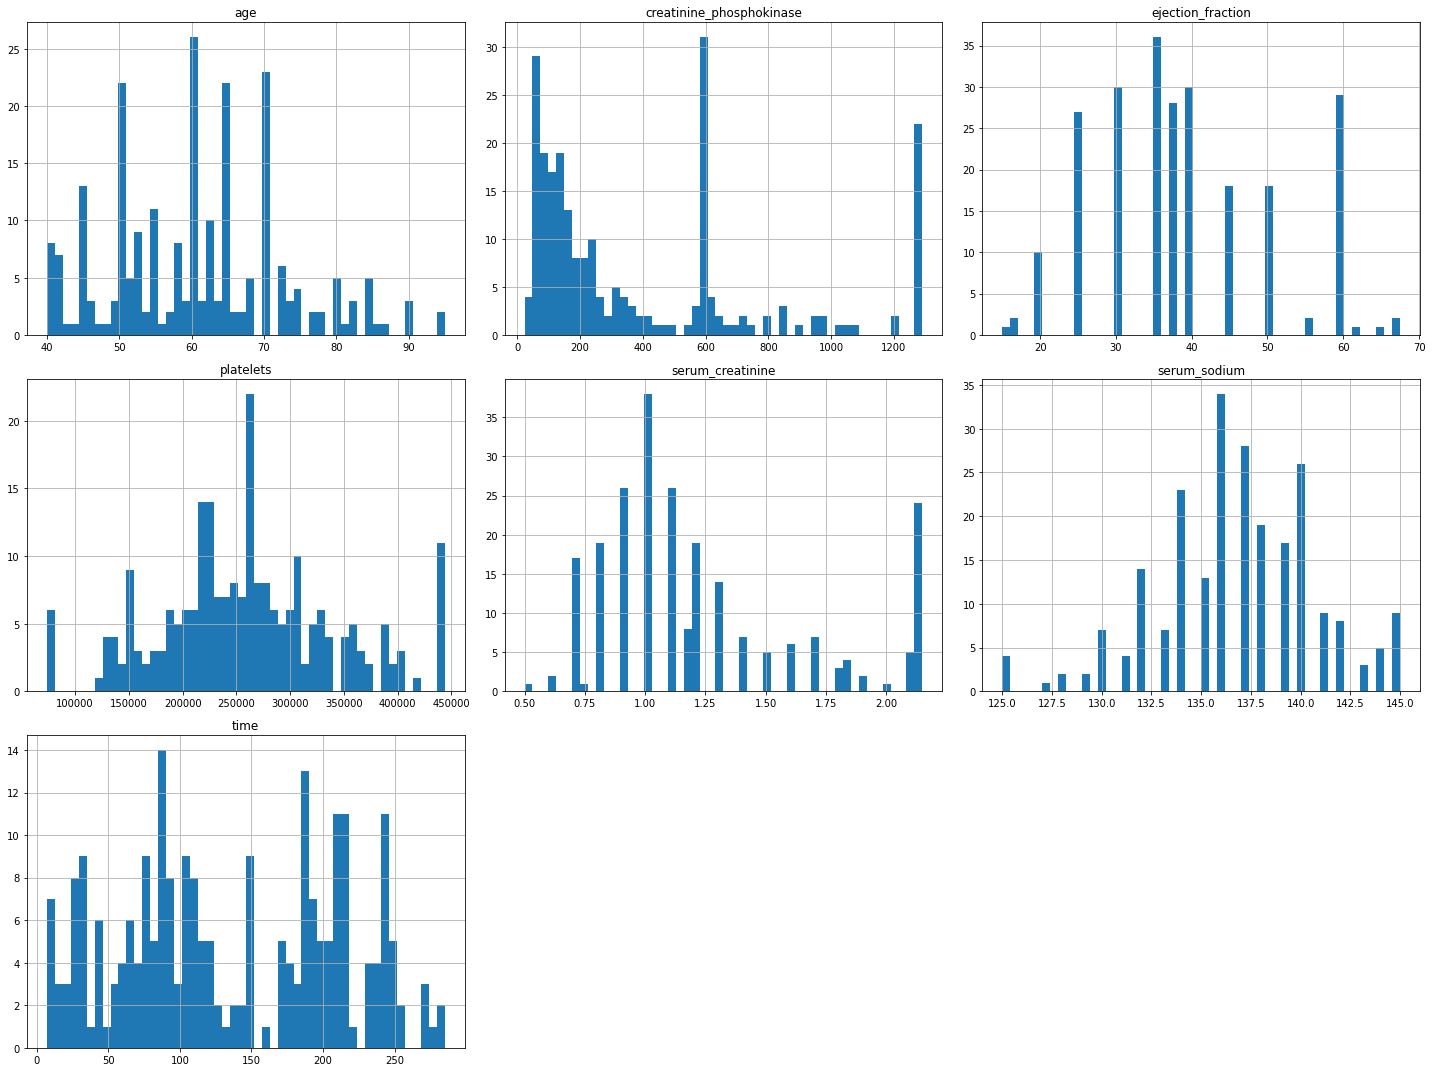

In [30]:
X_train.hist(bins=50, figsize=(20,15))
plt.tight_layout()
print('Skewness Value : ', X_train[X_train.columns].skew())

Distribusi cenderung normal, dengan kolom 'creatinine_phosphokinase' dan 'serum_creatinine' skewed.

Concat dengan kolom-kolom pada dataframe 'num_labaled' yang sebelumnya di-drop.

In [31]:
X_train = pd.concat([X_train, num_labaled], axis= 1)

In [32]:
X_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
296,45.0,1290.75,60.0,443750.0,0.80,138.0,278.0,0,1,0,0,0
142,50.0,482.00,30.0,329000.0,0.90,132.0,109.0,0,1,0,0,0
168,65.0,582.00,40.0,270000.0,1.00,138.0,140.0,0,1,0,0,0
105,72.0,328.00,30.0,443750.0,1.70,138.0,88.0,1,0,1,0,1
280,70.0,1290.75,40.0,241000.0,1.00,137.0,247.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,55.0,84.00,38.0,443750.0,1.30,136.0,246.0,0,1,0,0,0
247,64.0,143.00,25.0,246000.0,2.15,135.0,214.0,0,0,0,1,0
272,67.0,213.00,38.0,215000.0,1.20,133.0,245.0,0,0,0,0,0
41,50.0,124.00,30.0,153000.0,1.20,136.0,32.0,0,1,1,0,1


Mengganti urutan kolom pada X test agar sama dengan X train.

In [33]:
# Membuat df num_labaled dari X test
num_labaled_test = pd.DataFrame(X_test[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]).copy()

In [34]:
# Drop kolom 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking' pada X_test
X_test = X_test.drop(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis= 1)

In [35]:
X_test[0:5]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
148,75.0,582,30,225000.0,1.83,134,113
35,69.0,582,35,228000.0,3.50,134,30
286,60.0,253,35,279000.0,1.70,140,250
46,51.0,1380,25,271000.0,0.90,130,38
158,85.0,910,50,235000.0,1.30,134,121


In [36]:
# Concat
X_test = pd.concat([X_test, num_labaled_test], axis= 1)

In [37]:
X_test[0:5]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
148,75.0,582,30,225000.0,1.83,134,113,1,0,0,1,0
35,69.0,582,35,228000.0,3.50,134,30,0,1,0,1,0
286,60.0,253,35,279000.0,1.70,140,250,0,0,0,1,0
46,51.0,1380,25,271000.0,0.90,130,38,0,0,1,1,0
158,85.0,910,50,235000.0,1.30,134,121,1,0,0,1,0


Tidak ada missing values dalam dataset yang perlu di-handle.

## FEATURE SELECTION

Concat X train dan y train untuk dilihat hubungan feature dengan label.

In [38]:
X_y_train = pd.concat([X_train, y_train], axis= 1)

In [39]:
X_y_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
296,45.0,1290.75,60.0,443750.0,0.80,138.0,278.0,0,1,0,0,0,0
142,50.0,482.00,30.0,329000.0,0.90,132.0,109.0,0,1,0,0,0,0
168,65.0,582.00,40.0,270000.0,1.00,138.0,140.0,0,1,0,0,0,0
105,72.0,328.00,30.0,443750.0,1.70,138.0,88.0,1,0,1,0,1,1
280,70.0,1290.75,40.0,241000.0,1.00,137.0,247.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,55.0,84.00,38.0,443750.0,1.30,136.0,246.0,0,1,0,0,0,0
247,64.0,143.00,25.0,246000.0,2.15,135.0,214.0,0,0,0,1,0,0
272,67.0,213.00,38.0,215000.0,1.20,133.0,245.0,0,0,0,0,0,0
41,50.0,124.00,30.0,153000.0,1.20,136.0,32.0,0,1,1,0,1,1


In [40]:
corr_matrix = X_y_train.corr()
corr_matrix.DEATH_EVENT.sort_values(ascending= False)

DEATH_EVENT                 1.000000
serum_creatinine            0.384224
age                         0.254375
anaemia                     0.114039
high_blood_pressure         0.086007
diabetes                    0.022611
platelets                  -0.023423
sex                        -0.031639
smoking                    -0.043072
creatinine_phosphokinase   -0.044164
serum_sodium               -0.162388
ejection_fraction          -0.243480
time                       -0.504350
Name: DEATH_EVENT, dtype: float64

Text(0.5, 1.0, 'Heatmap Korelasi')

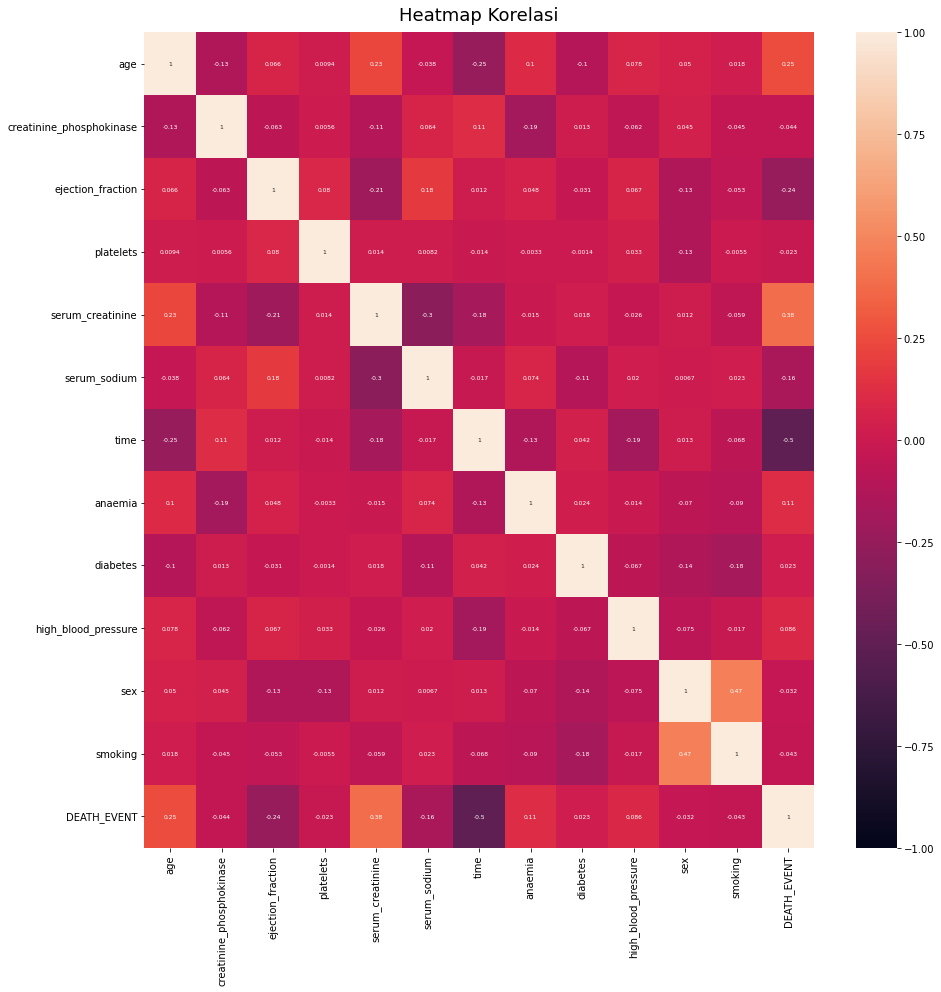

In [41]:
plt.figure(figsize= (15,15))

heatmap = sns.heatmap(corr_matrix, vmin= -1, vmax= 1, annot= True, annot_kws={'fontsize':6})
heatmap.set_title('Heatmap Korelasi', fontdict= {'fontsize': 18}, pad= 12)

Variabel-variabel yang secara linear memiliki keterkaitan tertinggi dengan 'DEATH_EVENT' (secara berurutan) adalah: 'time', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'age'.

In [42]:
# Melihat 5 feature terbaik menggunakan RFE
clf_rf = RandomForestClassifier()
rfe = RFE(estimator= clf_rf, n_features_to_select= 5, step= 1)
rfe = rfe.fit(X_train, y_train)

print('5 best feature berdasarkan RFE:', X_train.columns[rfe.support_])

5 best feature berdasarkan RFE: Index(['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time'], dtype='object')


5 best feature berdasarkan RFE adalah: 'age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time'.

Melihat dibutuhkan berapa feature untuk akurasi yang baik dan apa saja featurenya.

In [43]:
clf_rf2 = RandomForestClassifier()
rfecv = RFECV(estimator= clf_rf2, step= 1, cv= 5, scoring= 'accuracy')
rfecv = rfecv.fit(X_train, y_train)

print('Jumlah feature yang optimal:', rfecv.n_features_)
print('Best feature berdasarkan RFE:', X_train.columns[rfecv.support_])

Jumlah feature yang optimal: 7
Best feature berdasarkan RFE: Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')


Menurut RFECV dengan 5 fold, jumlah feature yang optimal adalah 5, yaitu: 'age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time'

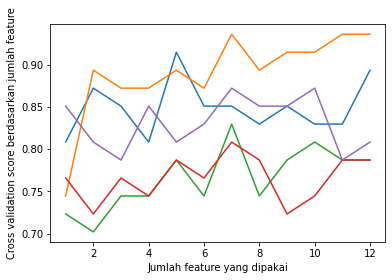

In [44]:
plt.figure()
plt.xlabel("Jumlah feature yang dipakai")
plt.ylabel("Cross validation score berdasarkan jumlah feature")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Digunakan 5 feature untuk mendapatkan CV score yang tidak terlalu rendah. Feature yang optimal berdasarkan Pearson correlation dan RFE memiliki perbedaan pada pemilihan 'serum_sodium' dan 'platelets'.

Kandungan sodium yang rendah dalam darah dapat terjadi karena [beberapa sebab](https://www.healthline.com/health/sodium-blood#results), salah satunya [gagal jantung](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5). Gagal jantung juga dapat mengakibatkan [aktivasi platelet](https://academic.oup.com/eurheartj/article/27/22/2623/2887328?login=false) dan mempengaruhi produksinya. Meskipun begitu, teraktivasinya platelet (trombosit) juga dapat disebabkan penyakit komorbid.

Tidak ada informasi mengenai penyakit komorbid dalam dataset, dan menurut Pearson correlation 'serum_sodium' lebih banyak memiliki korelasi terhadap target, dibandingkan dengan 'platelets'. Maka feature yang dipakai adalah 'serum_sodium'.

5 feature yang digunakan dalam model: 'time', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'age'.

In [45]:
# Membuat X train dengan feature-feature hasil selection

X_train_selected = X_train[['time', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'age']].copy()

X_train_selected

,time,serum_creatinine,ejection_fraction,serum_sodium,age
296,278.0,0.80,60.0,138.0,45.0
142,109.0,0.90,30.0,132.0,50.0
168,140.0,1.00,40.0,138.0,65.0
105,88.0,1.70,30.0,138.0,72.0
280,247.0,1.00,40.0,137.0,70.0
...,...,...,...,...,...
279,246.0,1.30,38.0,136.0,55.0
247,214.0,2.15,25.0,135.0,64.0
272,245.0,1.20,38.0,133.0,67.0
41,32.0,1.20,30.0,136.0,50.0


In [46]:
# Membuat X test dengan feature-feature hasil selection

X_test_selected = X_test[['time', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'age']].copy()

X_test_selected[0:5]

,time,serum_creatinine,ejection_fraction,serum_sodium,age
148,113,1.83,30,134,75.0
35,30,3.50,35,134,69.0
286,250,1.70,35,140,60.0
46,38,0.90,25,130,51.0
158,121,1.30,50,134,85.0


## SCALING

Melihat distribusi data pada Train set.

Skewness Value :  time                 0.071578
serum_creatinine     0.930389
ejection_fraction    0.465773
serum_sodium        -0.285215
age                  0.403198
dtype: float64


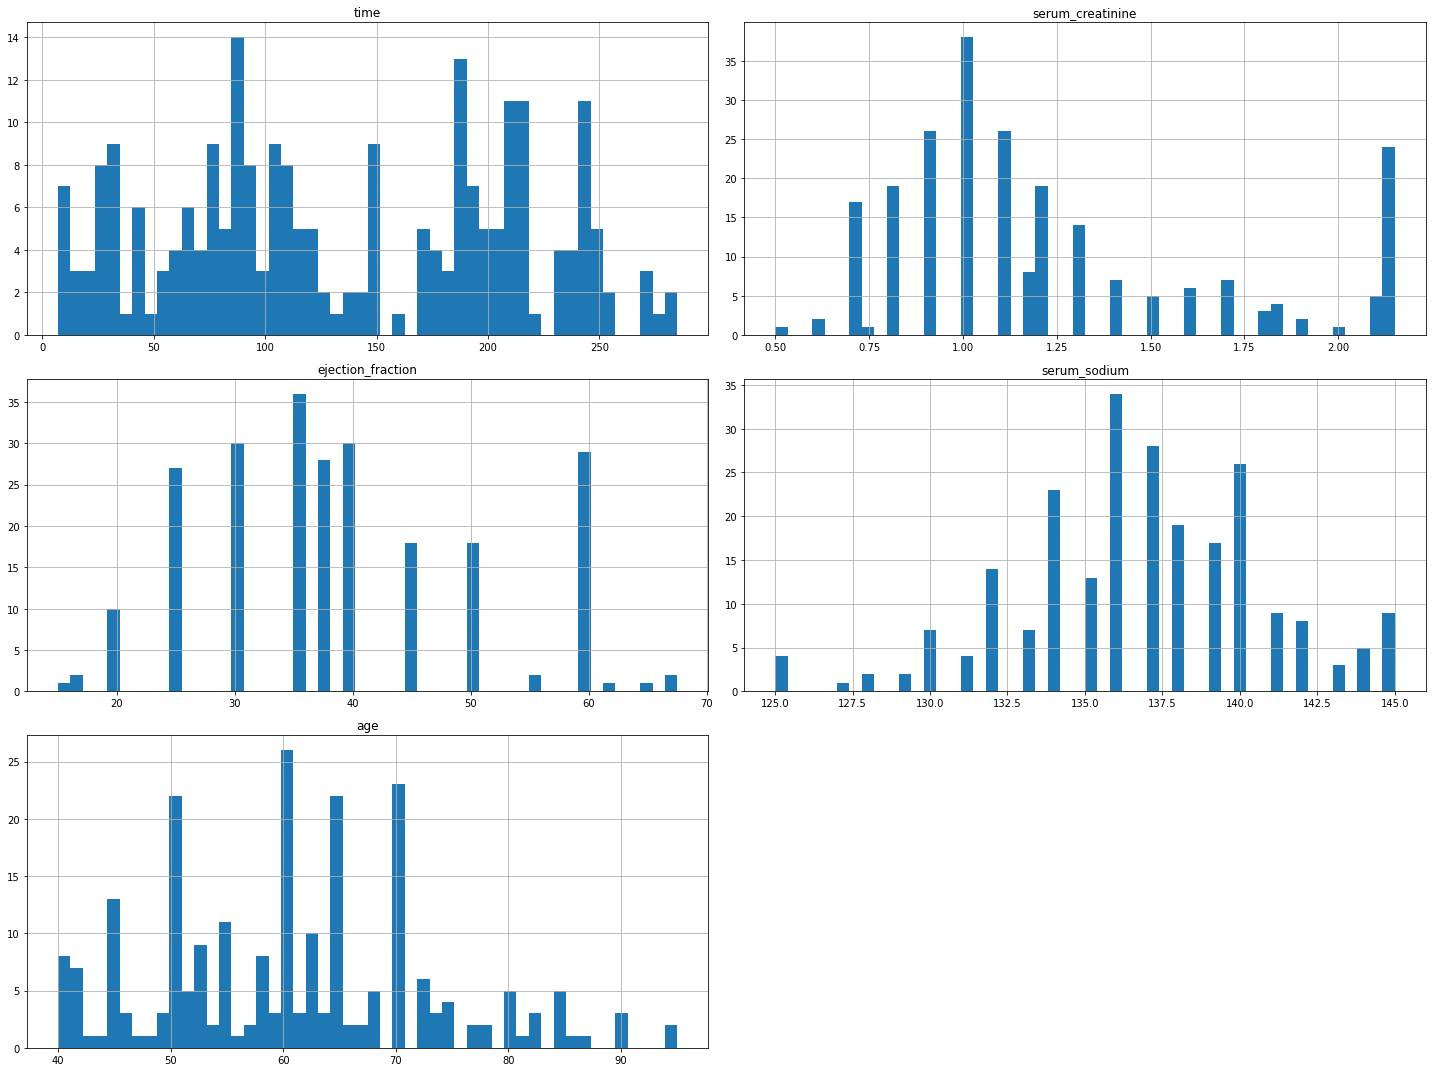

In [47]:
X_train_selected.hist(bins=50, figsize=(20,15))
plt.tight_layout()
print('Skewness Value : ', X_train_selected[X_train_selected.columns].skew())

Scaling features pada Train set menggunakan **standard scaller**, karena distribusi data normal (kecuali 'serum_creatinine'). Akan dibuat dua model untuk memprediksi apakah pasien dengan kondisi riwayat kesehatannya akan meninggal dalam masa follow up / tidak. Dibuat masing-maisng pipeline untuk setiap model yang melakukan scaling sekaligus training (ke Train set) dan testing (ke Test set), agar mencegah data leak.

Model klasifikasi yang akan di-train adalah **Random Forest** dan **Gradient Boosting Clasifier**.

In [48]:
scaler = StandardScaler()

## MODEL DEFINITION

In [49]:
clf_forest = RandomForestClassifier(n_estimators= 120, criterion= 'entropy', max_depth= 10)
clf_gbc = GradientBoostingClassifier(n_estimators= 120, learning_rate= 0.01, max_depth= 10)

In [50]:
pipe_forest = Pipeline([('scaler', scaler), ('forest', clf_forest)])
pipe_gbc = Pipeline([('scaler', scaler), ('gbc', clf_gbc)])

## MODEL TRAINING

Mengubah X train dan y train ke dalam bentuk array.

In [51]:
X_train_selected

,time,serum_creatinine,ejection_fraction,serum_sodium,age
296,278.0,0.80,60.0,138.0,45.0
142,109.0,0.90,30.0,132.0,50.0
168,140.0,1.00,40.0,138.0,65.0
105,88.0,1.70,30.0,138.0,72.0
280,247.0,1.00,40.0,137.0,70.0
...,...,...,...,...,...
279,246.0,1.30,38.0,136.0,55.0
247,214.0,2.15,25.0,135.0,64.0
272,245.0,1.20,38.0,133.0,67.0
41,32.0,1.20,30.0,136.0,50.0


In [52]:
Xtrain = X_train_selected.values
Xtrain[0:5]

array([[278. ,   0.8,  60. , 138. ,  45. ],
       [109. ,   0.9,  30. , 132. ,  50. ],
       [140. ,   1. ,  40. , 138. ,  65. ],
       [ 88. ,   1.7,  30. , 138. ,  72. ],
       [247. ,   1. ,  40. , 137. ,  70. ]])

In [53]:
y_train

,DEATH_EVENT
296,0
142,0
168,0
105,1
280,0
...,...
279,0
247,0
272,0
41,1


In [54]:
ytrain = y_train.values
ytrain[0:5]

array([[0],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

Scaling & Training model:

In [55]:
RF = pipe_forest.fit(Xtrain, ytrain)
GBC = pipe_gbc.fit(Xtrain, ytrain)

## MODEL EVALUATION

Memprediksi apakah pasien dengan gangguan kardiovaskular akan meninggal sebelum menjalani _follow up_ berikutnya / tidak dengan data dari X test. Hyperparameter ditetapkan secara manual, dan setalahnya dilakukan tuning terhadap nenerapa hyperparameter.

Mengubah X test dan y test ke dalam bentuk array:

In [56]:
Xtest = X_test_selected.values
Xtest[0:5]

array([[113.  ,   1.83,  30.  , 134.  ,  75.  ],
       [ 30.  ,   3.5 ,  35.  , 134.  ,  69.  ],
       [250.  ,   1.7 ,  35.  , 140.  ,  60.  ],
       [ 38.  ,   0.9 ,  25.  , 130.  ,  51.  ],
       [121.  ,   1.3 ,  50.  , 134.  ,  85.  ]])

In [57]:
ytest = y_test.values
ytest[0:5]

array([[1],
       [1],
       [0],
       [1],
       [0]], dtype=int64)

#### Random Forest

In [58]:
yhat_rf = RF.predict(Xtest)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.77      0.95      0.85        21

    accuracy                           0.88        59
   macro avg       0.87      0.90      0.88        59
weighted avg       0.90      0.88      0.88        59

0.8813559322033898


Text(0.5, 15.0, 'Predicted label')

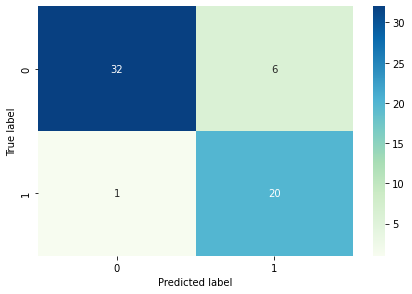

In [59]:
# Print classification report, accuracy score
print(classification_report(ytest,yhat_rf))
print(accuracy_score(ytest,yhat_rf))

# Plot confusion matrix
sns.heatmap((metrics.confusion_matrix(ytest,yhat_rf)),annot=True,fmt='.5g',cmap="GnBu")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Membandingkan akurasi model terhadap X test dan X train:

In [60]:
yhat_rf_train = RF.predict(Xtrain)

print('Accuracy score train: ', accuracy_score(ytrain, yhat_rf_train))
print('F1-score train: ', f1_score(ytrain, yhat_rf_train))
print('Precision score train: ', precision_score(ytrain, yhat_rf_train, average="macro"))
print('Recall score train: ', recall_score(ytrain, yhat_rf_train, average="macro"))

print('Accuracy score test: ', accuracy_score(ytest, yhat_rf))
print('F1-score test: ', f1_score(ytest, yhat_rf))
print('Precision score test: ', precision_score(ytest, yhat_rf, average="macro"))
print('Recall score test: ', recall_score(ytest, yhat_rf, average="macro"))

Accuracy score train:  1.0
F1-score train:  1.0
Precision score train:  1.0
Recall score train:  1.0
Accuracy score test:  0.8813559322033898
F1-score test:  0.8510638297872339
Precision score test:  0.8694638694638694
Recall score test:  0.8972431077694235


Model **_overfit_** terhadap train set.

Hyperparameter tuning dengan grid search cross validation.

Hyperparameter Random Forest yang akan dicari: n_estimators, criterion, max_depth

In [61]:
param_grid_rf = {
    'n_estimators': [int(x) for x in np.linspace(10, 1000, 10)],
    'criterion': ['gini', 'entropy'],
    'max_depth': [int(x) for x in np.linspace(1, 100, 10)]
}

In [62]:
grid_search_rf = GridSearchCV(estimator= clf_rf, param_grid= param_grid_rf, cv= 5, n_jobs=-1, verbose=2)
grid_search_rf.fit(Xtrain, ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100],
                         'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780,
                                          890, 1000]},
             verbose=2)

In [63]:
RFBest = grid_search_rf.best_estimator_
RFBest

RandomForestClassifier(criterion='entropy', max_depth=45, n_estimators=450)

Prediksi y menggunakan model dengan hyperparameter hasil tuning:

In [64]:
yhat_rf_best = RFBest.predict(Xtest)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.77      0.95      0.85        21

    accuracy                           0.88        59
   macro avg       0.87      0.90      0.88        59
weighted avg       0.90      0.88      0.88        59

0.8813559322033898


Text(0.5, 15.0, 'Predicted label')

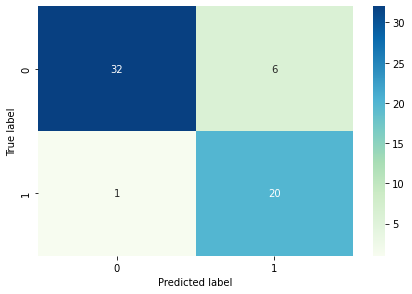

In [65]:
# Print classification report, accuracy score
print(classification_report(ytest,yhat_rf_best))
print(accuracy_score(ytest,yhat_rf_best))

# Plot confusion matrix
sns.heatmap((metrics.confusion_matrix(ytest,yhat_rf_best)),annot=True,fmt='.5g',cmap="GnBu")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Membandingkan akurasi model terhadap X test dan X train:

In [66]:
yhat_rfbest_train = RFBest.predict(Xtrain)

print('Accuracy score train: ', accuracy_score(ytrain, yhat_rfbest_train))
print('F1-score train: ', f1_score(ytrain, yhat_rfbest_train))
print('Precision score train: ', precision_score(ytrain, yhat_rfbest_train, average="macro"))
print('Recall score train: ', recall_score(ytrain, yhat_rfbest_train, average="macro"))

print('Accuracy score test: ', accuracy_score(ytest, yhat_rf_best))
print('F1-score test: ', f1_score(ytest, yhat_rf_best))
print('Precision score test: ', precision_score(ytest, yhat_rf_best, average="macro"))
print('Recall score test: ', recall_score(ytest, yhat_rf_best, average="macro"))

Accuracy score train:  1.0
F1-score train:  1.0
Precision score train:  1.0
Recall score train:  1.0
Accuracy score test:  0.8813559322033898
F1-score test:  0.8510638297872339
Precision score test:  0.8694638694638694
Recall score test:  0.8972431077694235


Model **_overfit_** terhadap train set. Nilai akurasi, f1-score, precision, dan recall pada model Random Forest yang sudah di-tuning hyperparameternya lebih baik dibandingkan dengan model yang hyperparameter-nya belum di-tuning. Pada kedua model, nilai Precision terhadap Test set sedikit lebih tinggi daripada nilai recall-nya.

#### Gradient Boosting Classification

In [67]:
yhat_gbc = GBC.predict(Xtest)

Text(0.5, 15.0, 'Predicted label')

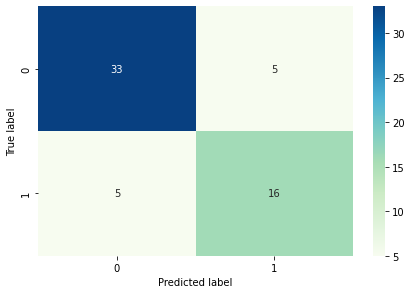

In [68]:
# Plot confusion matrix
sns.heatmap((metrics.confusion_matrix(ytest,yhat_gbc)),annot=True,fmt='.5g',cmap="GnBu")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Membandingkan akurasi model terhadap X test dan X train:

In [69]:
yhat_gbc_train = GBC.predict(Xtrain)

print('Accuracy score train: ', accuracy_score(ytrain, yhat_gbc_train))
print('F1-score train: ', f1_score(ytrain, yhat_gbc_train))
print('Precision score train: ', precision_score(ytrain, yhat_gbc_train, average="macro"))
print('Recall score train: ', recall_score(ytrain, yhat_gbc_train, average="macro"))

print('Accuracy score test: ', accuracy_score(ytest, yhat_gbc))
print('F1-score test: ', f1_score(ytest, yhat_gbc))
print('Precision score test: ', precision_score(ytest, yhat_gbc, average="macro"))
print('Recall score test: ', recall_score(ytest, yhat_gbc, average="macro"))

Accuracy score train:  1.0
F1-score train:  1.0
Precision score train:  1.0
Recall score train:  1.0
Accuracy score test:  0.8305084745762712
F1-score test:  0.7619047619047619
Precision score test:  0.8151629072681704
Recall score test:  0.8151629072681704


Model **_overfit_** terhadap train set.

Hyperparameter tuning dengan grid search cross validation.

Hyperparameter Random Forest yang akan dicari: n_estimators, learning_rate, max_depth

In [70]:
param_grid_gbc = {
    'n_estimators': [int(x) for x in np.linspace(100, 600, 10)],
    'learning_rate': [10, 1.0, 0.1, 0.01],
    'max_depth': [int(x) for x in np.linspace(10, 1000, 10)]
}

In [71]:
grid_search_gbc = GridSearchCV(estimator= clf_gbc, param_grid= param_grid_gbc, cv= 5, n_jobs=-1, verbose=2)
grid_search_gbc.fit(Xtrain, ytrain)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  max_depth=10,
                                                  n_estimators=120),
             n_jobs=-1,
             param_grid={'learning_rate': [10, 1.0, 0.1, 0.01],
                         'max_depth': [10, 120, 230, 340, 450, 560, 670, 780,
                                       890, 1000],
                         'n_estimators': [100, 155, 211, 266, 322, 377, 433,
                                          488, 544, 600]},
             verbose=2)

In [72]:
GBCBest = grid_search_gbc.best_estimator_
GBCBest

GradientBoostingClassifier(learning_rate=10, max_depth=120, n_estimators=600)

Prediksi y menggunakan model dengan hyperparameter hasil tuning:

In [73]:
yhat_gbc_best = GBCBest.predict(Xtest)

Text(0.5, 15.0, 'Predicted label')

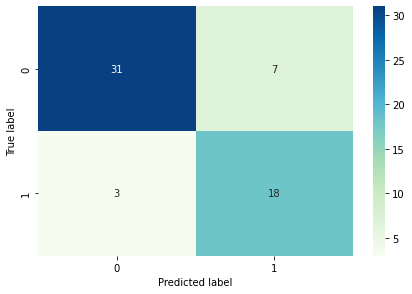

In [74]:
# Plot confusion matrix
sns.heatmap((metrics.confusion_matrix(ytest,yhat_gbc_best)),annot=True,fmt='.5g',cmap="GnBu")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Membandingkan akurasi model terhadap X train dan X test:

In [75]:
yhat_gbcbest_train = GBCBest.predict(Xtrain)

print('Accuracy score train: ', accuracy_score(ytrain, yhat_gbcbest_train))
print('F1-score train: ', f1_score(ytrain, yhat_gbcbest_train))
print('Precision score train: ', precision_score(ytrain, yhat_gbcbest_train, average="macro"))
print('Recall score train: ', recall_score(ytrain, yhat_gbcbest_train, average="macro"))

print('Accuracy score test: ', accuracy_score(ytest, yhat_gbc_best))
print('F1-score test: ', f1_score(ytest, yhat_gbc_best))
print('Precision score test: ', precision_score(ytest, yhat_gbc_best, average="macro"))
print('Recall score test: ', recall_score(ytest, yhat_gbc_best, average="macro"))

Accuracy score train:  1.0
F1-score train:  1.0
Precision score train:  1.0
Recall score train:  1.0
Accuracy score test:  0.8305084745762712
F1-score test:  0.782608695652174
Precision score test:  0.8158823529411765
Recall score test:  0.8364661654135338


Model **_overfit_** terhadap train set. Nilai akurasi, f1-score, precision, dan recall pada model Random Forest yang sudah di-tuning hyperparameternya lebih baik dibandingkan dengan model yang hyperparameter-nya belum di-tuning. Pada kedua model, nilai Precision terhadap Test set sedikit lebih tinggi daripada nilai recall-nya.

## MODEL INFERENCE

Menggunakan model yang sudah di-train untuk memberikan prediksi dari data baru.

In [76]:
# Dari data yang sudah dipisahkan, hanya diambil kolom - kolom yang dipakai dalam Xtrain
inference = df_inference[['time', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'age']].copy()
inference

,time,serum_creatinine,ejection_fraction,serum_sodium,age
206,187,0.8,40,141,40.0
84,78,1.0,25,141,59.0
205,187,1.0,45,136,50.0
172,146,1.1,60,145,70.0
78,74,0.6,38,131,75.0


Prediksi apakah apsien akan meninggal sebelum _follow up_ selanjutnya (1) atau tidak (0), dilihat dari riwayat medisnya. Prediksi terhadap data baru dilakukan menggunakan model **Random Forest** (setelah hyperparameter tuning) dan **Gradient Boosting Classification** (setelah hyperparameter tuning).

In [77]:
# Random Forest
yhat_rf_inf = RFBest.predict(inference)
yhat_rf_inf

array([0, 0, 0, 0, 0], dtype=int64)

In [78]:
# Gradient Boosting Classification
yhat_gbc_inf = GBCBest.predict(inference)
yhat_gbc_inf

array([0, 0, 0, 0, 1], dtype=int64)

## CONCLUSION

Berdasarkan _feature selection_ yang digunakan dalam model, terdapat beberapa faktor yang perlu diperhatikan dalam memprediksi apakah pasien akan meninggal sebelum menjalani _follow up_ berikutnya:
- durasi waktu sebelum _follow up_ berikutnya (_follow up period_)
- kandungan kreatinin dalam darah
- banyaknya darah yang meninggalkan jantung setiap kali jantung berkontraksi
- kandungan sodium dalam darah
- umur pasien

Dengan data yang sudah di-capping sehingga tidak ada noise, model **Gradient Boosting Classification** menghasilkan f1-score yang lebih baik daripada Random Forest. Namun kedua model memberikan nilai  _precision_ yang lebih tinggi daripada _recall_, berbeda dari yang diharapkan pada awal _problem statement_. Tuning hyperparameter pada Gradient Boosting Classification dengan lebih seksama lagi dapat meningkatkan akurasinya menjadi lebih baik lagi.